# Regression Algorithms

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 40, 
                            random_state = 0)

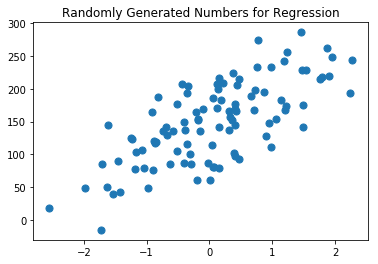

In [3]:

plt.figure()
plt.title('Randomly Generated Numbers for Regression')
plt.scatter(X_R1, y_R1, marker = 'o', s = 50)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

In [6]:
Lr = LinearRegression()
Lr_model = Lr.fit(X_train, y_train)
print('Linear intercept: ', Lr.intercept_, 'Linear slope: ', Lr.coef_)

Linear intercept:  147.9276712754516 Linear slope:  [46.81643791]


# Estimate the Accuracy of the model on the train and test data

In [7]:
print(Lr.score(X_train, y_train), mean_squared_error(Lr.predict(X_test), y_test))
print(Lr.score(X_test, y_test), mean_squared_error(Lr.predict(X_train), y_train))

0.5547421684136637 1959.875806218093
0.29432289534049905 1801.5019949556263


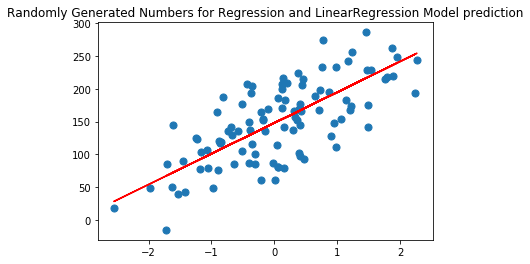

In [8]:
plt.figure()
plt.title('Randomly Generated Numbers for Regression and LinearRegression Model prediction')
plt.scatter(X_R1, y_R1, marker = 'o', s = 50)
y = Lr.coef_ * X_R1 + Lr.intercept_
plt.plot(X_R1, y, color = 'red')

# Linear Regression, Ridge

In [9]:
from sklearn.linear_model import Ridge
alpha = 20
Rd = Ridge(alpha=alpha)
Rd_model = Rd.fit(X_train, y_train)
print('Ridge_train_score: ', Rd_model.score(X_train, y_train), 
      'Ridge_test_score: ', Rd_model.score(X_test, y_test))
print('Ridge Intercept: ', Rd_model.intercept_, 'Ridge Coefficient', Rd_model.coef_)

Ridge_train_score:  0.5310626744115854 Ridge_test_score:  0.3615980690414837
Ridge Intercept:  147.9689949149854 Ridge Coefficient [37.1439324]


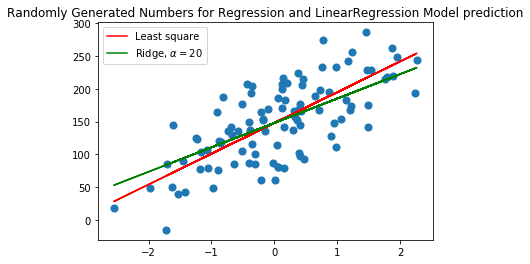

In [10]:
plt.figure()
plt.title('Randomly Generated Numbers for Regression and LinearRegression Model prediction')
plt.scatter(X_R1, y_R1, marker = 'o', s = 50)
y_Lr = Lr.coef_ * X_R1 + Lr.intercept_
y_Ridge = Rd_model.coef_ * X_R1 + Rd_model.intercept_
plt.plot(X_R1, y_Lr, color = 'red', label = 'Least square')
plt.plot(X_R1, y_Ridge, color = 'green', label = r'Ridge, $\alpha = $' + str(alpha))
plt.legend()

# Apply Scaler Function

In [11]:
from sklearn.preprocessing import MinMaxScaler
from adspy_shared_utilities import load_crime_dataset

(X_crime, y_crime) = load_crime_dataset()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)



In [12]:
sc = True
if sc == True:
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


alpha = 0, R^2 train: 0.6731208442568583, R^2 test: 0.4955445228160203
alpha = 1, R^2 train: 0.6601626186165614, R^2 test: 0.5602700804814065
alpha = 2, R^2 train: 0.6538792960475888, R^2 test: 0.5690624857678088
alpha = 4, R^2 train: 0.6456370412230577, R^2 test: 0.5795031059075716
alpha = 8, R^2 train: 0.6347513338194614, R^2 test: 0.590980449136704
alpha = 16, R^2 train: 0.6202606970891356, R^2 test: 0.5984072441186045
alpha = 32, R^2 train: 0.6007483343300337, R^2 test: 0.5940325211193526
alpha = 50, R^2 train: 0.5844355332686064, R^2 test: 0.5827118574381553
alpha = 100, R^2 train: 0.550534654006291, R^2 test: 0.551063747355718
alpha = 1000, R^2 train: 0.30788607808877777, R^2 test: 0.30200153734064805


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.517644e-18
  overwrite_a=True).T


Text(0, 0.5, 'R$^{2}$ Score')

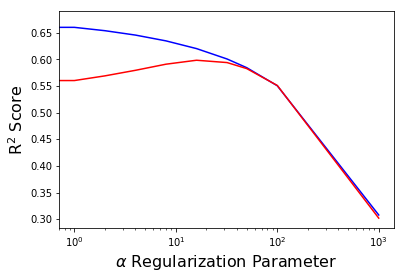

In [13]:
alpha_list = [0, 1, 2, 4, 8, 16, 32, 50, 100, 1000]
r2_train = []
r2_test = []

for alpha_var in alpha_list:
    linRd = Ridge(alpha=alpha_var).fit(X_train_scaled, y_train)
    r2_train.append(linRd.score(X_train_scaled, y_train))
    r2_test.append(linRd.score(X_test_scaled, y_test))
    print('alpha = {}, R^2 train: {}, R^2 test: {}'.format(alpha_var, linRd.score(X_train_scaled, y_train), 
                                               linRd.score(X_test_scaled, y_test)))
plt.figure()
plt.semilogx(alpha_list, r2_train, label = "Train data", color = 'b')
plt.semilogx(alpha_list, r2_test, label = "Test data", color = 'r')
plt.xlabel(r'$\alpha $ Regularization Parameter', fontsize = 16)
plt.ylabel(r'R$^{2}$ Score', fontsize = 16)

# Lasso Regression

In [14]:
 from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

linlasso = Lasso(alpha=2, max_iter=1000).fit(X_train_scaled, y_train)
print('R_squared score of train data: {} r_squared score of test data: {}'
      .format(linlasso.score(X_train_scaled, y_train), linlasso.score(X_test_scaled, y_test)))


R_squared score of train data: 0.6307013668705859 r_squared score of test data: 0.6421928287487964


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


alpha = 0.01 0.3984821480441514
alpha = 0.1 0.547944582833239
alpha = 1 0.6454687152013457
alpha = 5 0.6225846220254736
alpha = 10 0.5926396020344411
alpha = 20 0.5224453786781722
alpha = 50 0.3238241154840802
alpha = 70 0.11224233605341116
alpha = 90 -1.6721847235778853e-06


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


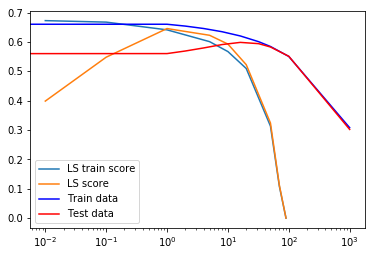

In [15]:
%matplotlib inline
alpha_list2 = [0.01, 0.1, 1, 5, 10, 20, 50, 70, 90]
plot_list = []
for i in alpha_list2:
    linlasso = Lasso(alpha = i, max_iter=2000).fit(X_train_scaled, y_train)
    plot_list.append((i, linlasso.score(X_train_scaled, y_train), linlasso.score(X_test_scaled, y_test)))
    print('alpha = {}'.format(i), linlasso.score(X_test_scaled, y_test))

x = [i[0] for i in plot_list]
y_tr = [i[1] for i in plot_list]
y_te = [i[2] for i in plot_list]
plt.semilogx(x, y_tr, label = 'LS train score')
plt.semilogx(x, y_te, label = 'LS score')
plt.semilogx(alpha_list, r2_train, label = "Train data", color = 'b')
plt.semilogx(alpha_list, r2_test, label = "Test data", color = 'r')
plt.legend()

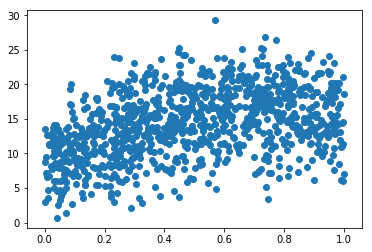

In [16]:
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
X_F1, y_F1 = make_friedman1(n_samples=1000, n_features = 7, random_state = 0)
plt.scatter(X_F1[:, 1], y_F1)

Linear regression slope: [ 7.48  6.76 -0.12  9.47  4.93  0.09  0.26], 
intercept: 0.059, R^2_train: 0.770, R^2_test: 0.747


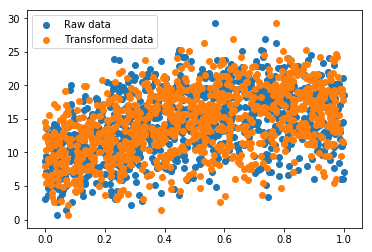

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)
print('Linear regression slope: {}, \nintercept: {:.3f}, R^2_train: {:.3f}, R^2_test: {:.3f}'.format(linreg.coef_.round(2), 
                                                                                      linreg.intercept_, 
                                                                                      linreg.score(X_train, y_train),
                                                                                      linreg.score(X_test, y_test)))

plt.scatter(X_F1[:, 1], y_F1, label = 'Raw data')
poly = PolynomialFeatures(degree=4)
X_F1_poly = poly.fit_transform(X_F1)
plt.scatter(X_F1_poly[:, 1], y_F1, label = 'Transformed data')
plt.legend()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)
print('Linear regression slope: {}, \nintercept: {:.3f}, R^2_train: {:.3f}, R^2_test: {:.3f}'.format(linreg.coef_.round(2), 
                                                                                      linreg.intercept_, 
                                                                                      linreg.score(X_train, y_train),
                                                                                      linreg.score(X_test, y_test)))


Linear regression slope: [ 0.000e+00 -4.590e+00 -3.130e+00 -2.127e+01  8.910e+00  8.800e-01
 -2.020e+00 -1.750e+00  9.780e+00  2.612e+01 -3.700e-01  1.280e+00
  3.380e+00  4.330e+00  1.870e+00  7.930e+00 -1.000e-01  1.900e-01
  2.930e+00  2.730e+00  7.200e-01  2.037e+01  2.500e+00  1.950e+00
  1.250e+00  1.890e+00  2.160e+00  1.140e+00 -8.600e-01  6.900e-01
  4.950e+00  4.000e+00  4.470e+00  4.200e-01  6.000e-02  5.300e-01
 -1.308e+01  2.113e+01  1.190e+00 -1.920e+00 -6.400e-01 -1.840e+00
 -2.430e+00  2.230e+01  2.210e+00 -5.600e-01 -2.000e+00 -1.960e+00
 -2.980e+00 -7.600e-01  4.600e-01 -8.400e-01 -4.000e-02  1.970e+00
 -1.030e+00  2.450e+00 -1.960e+00 -2.000e-02 -2.200e+00 -4.620e+00
 -2.140e+00 -3.040e+00  1.600e-01 -3.400e-01 -1.296e+01  3.690e+00
 -2.830e+00 -2.000e-02 -1.940e+00 -1.700e-01 -1.580e+00 -1.300e+00
 -7.600e-01 -2.080e+00 -8.200e-01  1.320e+00  7.600e-01  2.000e+00
  1.390e+00 -1.910e+00 -3.690e+00 -2.120e+00 -1.620e+00  8.100e-01
  5.100e-01  0.000e+00 -4.200e-01 -1.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linridge = Ridge().fit(X_train, y_train)
print('Ridge regression slope: {}, \n intercept: {:.3f}, Ridge R^2_train: {:.3f}, Ridge R^2_test: {:.3f}'
      .format(linridge.coef_.round(2), 
                                                                                      linridge.intercept_, 
                                                                                      linridge.score(X_train, y_train),
                                                                                      linridge.score(X_test, y_test)))


Ridge regression slope: [ 0.00e+00  4.44e+00  5.23e+00 -6.19e+00  5.44e+00  1.93e+00 -7.60e-01
 -3.90e-01  1.01e+00  1.04e+01 -5.10e-01  2.32e+00  1.08e+00  5.70e-01
  1.35e+00  1.66e+00 -5.50e-01  2.28e+00  1.05e+00  9.70e-01  6.10e-01
  7.60e-01 -8.10e-01 -8.90e-01 -1.40e+00 -2.14e+00  1.90e+00  1.68e+00
  1.11e+00  1.36e+00  1.03e+00  5.90e-01  4.60e-01 -1.90e-01 -1.10e-01
 -2.00e-01 -2.20e-01  6.00e-01 -5.90e-01  1.40e-01 -6.00e-02 -1.70e-01
 -1.30e-01  9.70e-01  2.74e+00  2.64e+00  2.96e+00  2.96e+00  3.16e+00
  1.05e+00 -5.20e-01  2.70e-01 -3.70e-01 -6.20e-01  5.10e-01  2.00e-01
 -9.00e-02  1.50e-01 -1.00e-02  1.20e-01  1.00e-02  2.00e-02  3.40e-01
  3.00e-01 -3.60e-01 -6.10e-01  2.00e-02 -2.50e-01  9.00e-02 -1.20e-01
  9.70e-01 -2.40e-01 -3.30e-01 -3.60e-01 -2.80e-01  5.50e-01 -1.00e-01
  4.00e-02  7.00e-02  2.20e-01 -2.00e-02  6.90e-01  3.40e-01 -3.90e-01
 -3.80e-01  2.49e+00  1.01e+00  8.70e-01  7.50e-01  6.50e-01 -5.00e-01
 -8.00e-02 -2.10e-01 -6.00e-02 -3.50e-01 -2.60e-01 -4

# Logistic Regression

Example of binary classification. Data are fruit, apple as positive others as negative, features height and width

/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


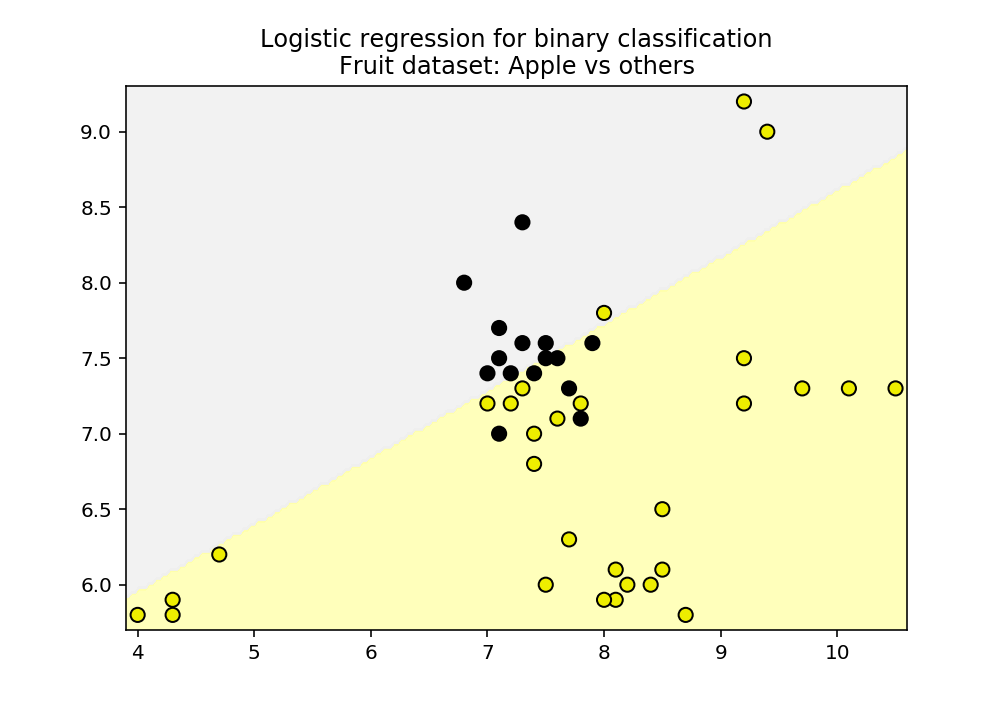

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import pandas as pd
import numpy as np

np.set_printoptions(precision = 2)

fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values, 
                                                    y_fruits_apple.values, 
                                                    random_state = 0)
clf = LogisticRegression(C =100).fit(X_train, y_train)

fig, subaxes = plt.subplots(1,1, figsize = (7,5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

In [22]:
h = 2
w = 2
['not an apple', 'an apple'][clf.predict([[h,w]])[0]]

/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


'not an apple'

In [23]:
np.set_printoptions(precision=2)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))
clf.predict(X_test)

0.7727272727272727 0.7333333333333333


array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False])

In [24]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2, n_redundant=0
                                 , n_informative=2, n_clusters_per_class=1, flip_y=0.1,
                                class_sep=0.5, random_state=0)


In [25]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


<IPython.core.display.Javascript object>


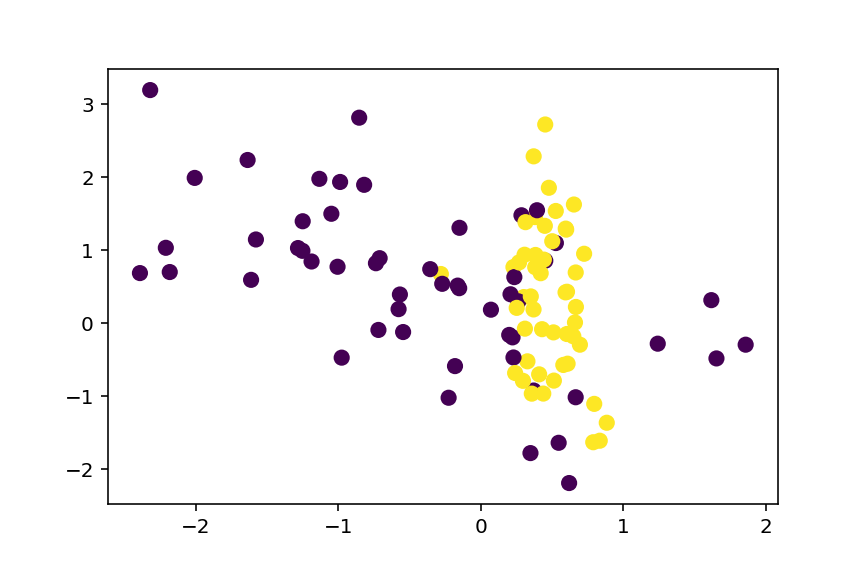

In [26]:
%matplotlib notebook
plt.scatter(X_C2[:, 0], X_C2[:, 1], c = y_C2, marker='o', 
           s = 50)

In [27]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
X_C2, y_C2 = make_classification(n_samples = 200, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
clf = LogisticRegression(C = 100).fit(X_train, y_train)
print('LogisticReg score on train data: {:.2f}'.format(clf.score(X_train, y_train)))
print('LogisticReg score on test data: {:.2f}'.format(clf.score(X_test, y_test)))


LogisticReg score on train data: 0.75
LogisticReg score on test data: 0.70


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


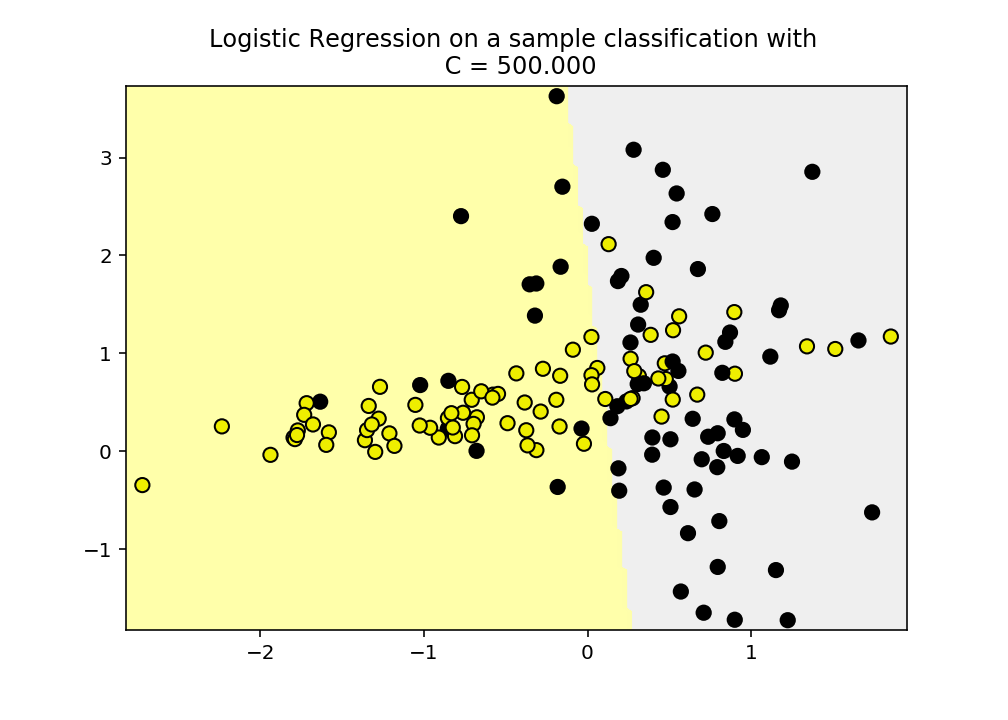

LogisticReg score on train data: 0.75, C = 0.1
LogisticReg score on test data: 0.74
LogisticReg score on train data: 0.75, C = 1.0
LogisticReg score on test data: 0.72
LogisticReg score on train data: 0.75, C = 10.0
LogisticReg score on test data: 0.70
LogisticReg score on train data: 0.75, C = 100.0
LogisticReg score on test data: 0.70
LogisticReg score on train data: 0.75, C = 500.0
LogisticReg score on test data: 0.70


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

In [28]:
 fig, subaxes = plt.subplots(1,1, figsize = (7,5))
titles = 'Logistic Regression on a sample classification'
c = [0.1, 1, 10, 100, 500]
for i in c:
    titles = 'Logistic Regression on a sample classification with \n C = {:.3f}'.format(i)
    clf = LogisticRegression(C = i).fit(X_train, y_train)
    print('LogisticReg score on train data: {:.2f}, C = {:.1f}'.format(clf.score(X_train, y_train), i))
    print('LogisticReg score on test data: {:.2f}'.format(clf.score(X_test, y_test)))

    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, titles, subaxes)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.values, y_fruits_apple.values, random_state = 0)

<IPython.core.display.Javascript object>


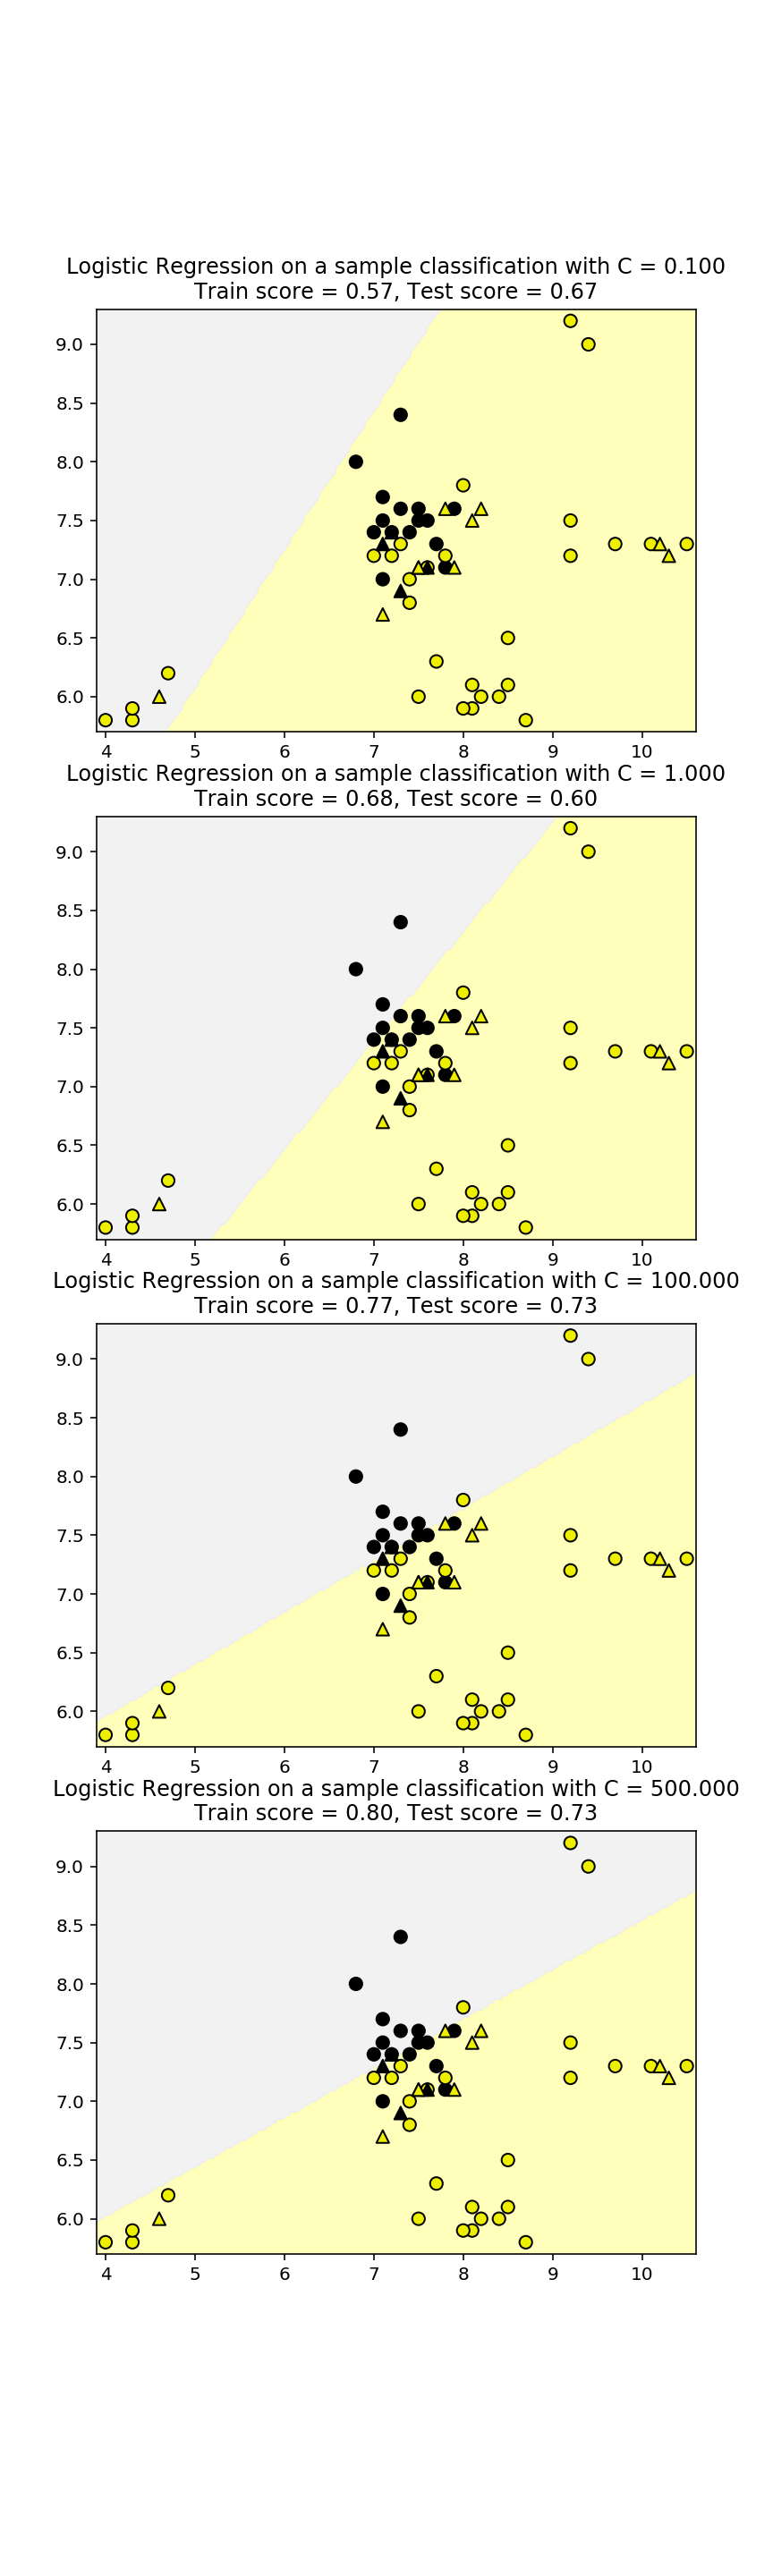

LogisticReg score on train data: 0.57, C = 0.1
LogisticReg score on test data: 0.67
LogisticReg score on train data: 0.68, C = 1.0
LogisticReg score on test data: 0.60
LogisticReg score on train data: 0.77, C = 100.0
LogisticReg score on test data: 0.73
LogisticReg score on train data: 0.80, C = 500.0
LogisticReg score on test data: 0.73


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
c = [0.1, 1, 100]
fig, subaxes = plt.subplots(4, 1, figsize = (6,20))
for i, subplot in zip([0.1, 1, 100, 500], subaxes):
    titles = 'Logistic Regression on a sample classification with C = {:.3f}'.format(i)
    clf = LogisticRegression(C = i).fit(X_train, y_train)
    print('LogisticReg score on train data: {:.2f}, C = {:.1f}'.format(clf.score(X_train, y_train), i))
    print('LogisticReg score on test data: {:.2f}'.format(clf.score(X_test, y_test)))
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, titles, subplot)
    

<IPython.core.display.Javascript object>


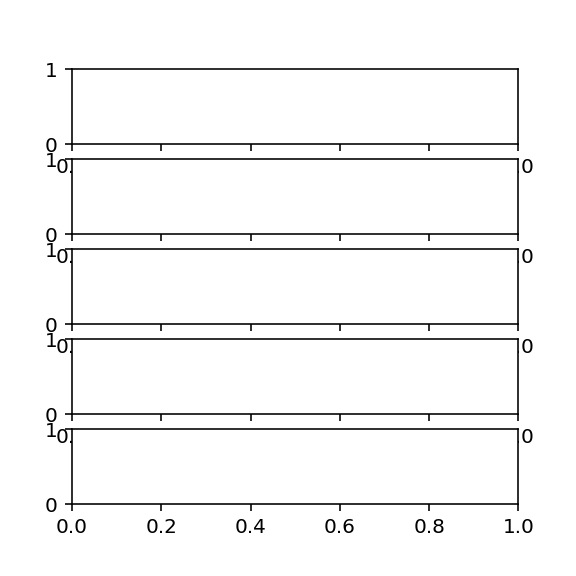

LogisticReg score on train data: 0.95, C = 0.1
LogisticReg score on test data: 0.94
LogisticReg score on train data: 0.96, C = 1.0
LogisticReg score on test data: 0.96
LogisticReg score on train data: 0.96, C = 10.0
LogisticReg score on test data: 0.96
LogisticReg score on train data: 0.97, C = 100.0
LogisticReg score on test data: 0.97
LogisticReg score on train data: 0.97, C = 1000.0
LogisticReg score on test data: 0.96


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

In [31]:
from sklearn.datasets import load_breast_cancer
fig, subaxes = plt.subplots(5, 1, figsize = (4,4))
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
for i, subplot in zip([0.1, 1, 10, 100, 1000], subaxes):
    try:
        clf = LogisticRegression(C = i).fit(X_train, y_train)
        titles = 'Logistic Regression on a sample classification with C = {:.3f}'.format(i)
        print('LogisticReg score on train data: {:.2f}, C = {:.1f}'.format(clf.score(X_train, y_train), i))
        print('LogisticReg score on test data: {:.2f}'.format(clf.score(X_test, y_test)))
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_train, titles, subplot)
    except:
        pass

<IPython.core.display.Javascript object>


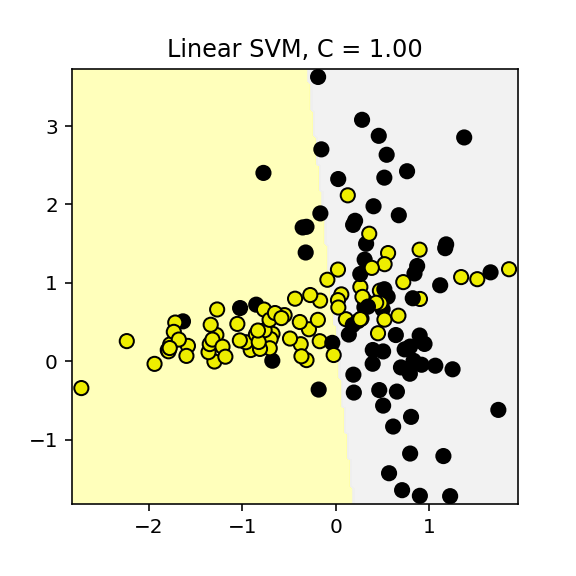

Linear SCM score: 0.740


In [32]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
this_C = 1
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize = (4,4))
title = 'Linear SVM, C = {:.2f}'.format(this_C)
clf = SVC(kernel = 'linear', C = this_C).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)
print('Linear SCM score: {:.3f}'.format(clf.score(X_train, y_train)))


<IPython.core.display.Javascript object>


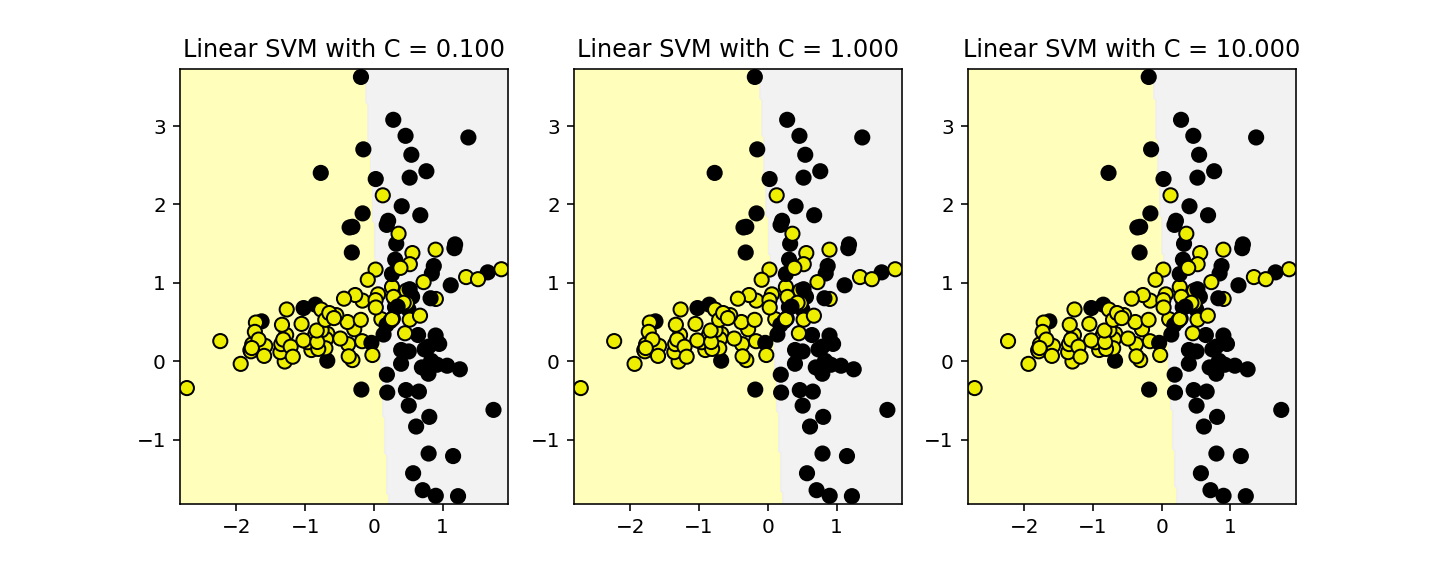

Linear SVM score: 0.747
Linear SVM score: 0.747
Linear SVM score: 0.747


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
from sklearn.svm import LinearSVC
fog, subaxes = plt.subplots(1, 3, figsize = (10, 4))
for i, subplot in zip([0.1, 1, 10], subaxes):
    title = 'Linear SVM with C = {:.3f}'.format(i)
    clf = LinearSVC(C = i).fit(X_train, y_train)
    print('Linear SVM score: {:.3f}'.format(clf.score(X_train, y_train)))
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)

Multi-class Classification

In [34]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)
clf = LinearSVC(C = 100, random_state = 0).fit(X_train, y_train)
print('Coefficient of classes: \n', clf.coef_, '\n Intercept of classes: \n', clf.intercept_)
print('Multiclassification score on train data: {:.2f}'.format(clf.score(X_train, y_train)) )
print('Multiclassification score on test data: {:.2f}'.format(clf.score(X_test, y_test)) )

Coefficient of classes: 
 [[-0.22  0.74]
 [-1.93  1.39]
 [-0.02  0.32]
 [ 1.29 -1.95]] 
 Intercept of classes: 
 [-4.63  1.43 -3.18  1.78]
Multiclassification score on train data: 0.77
Multiclassification score on test data: 0.53


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


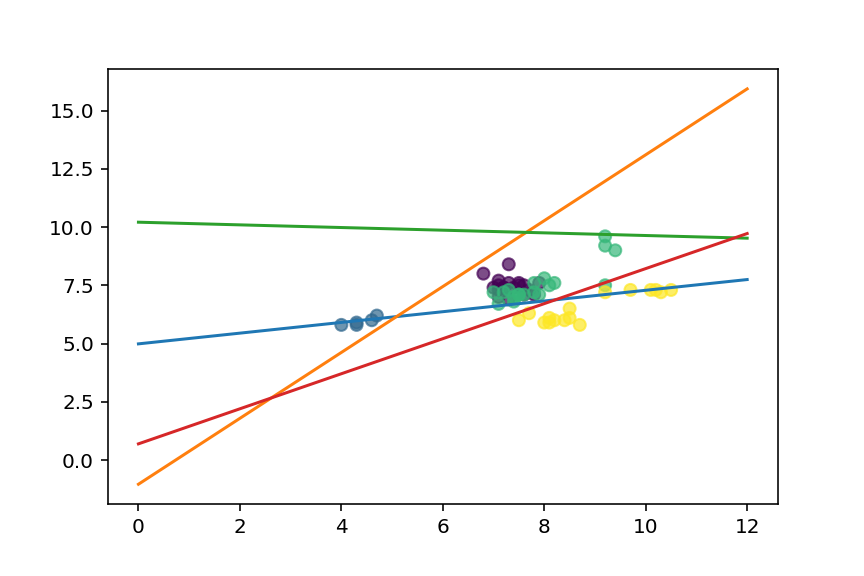

In [35]:
%matplotlib notebook
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)
clf = LinearSVC(C = 5, random_state = 0).fit(X_train, y_train)
plt.scatter(X_fruits_2d['height'], X_fruits_2d['width'], c = y_fruits_2d, alpha = 0.7)
x = np.linspace(0, 12)
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'b', 'g', 'yellow']):
    plt.plot(x, -(x * w[0] + b) / w[1])


/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


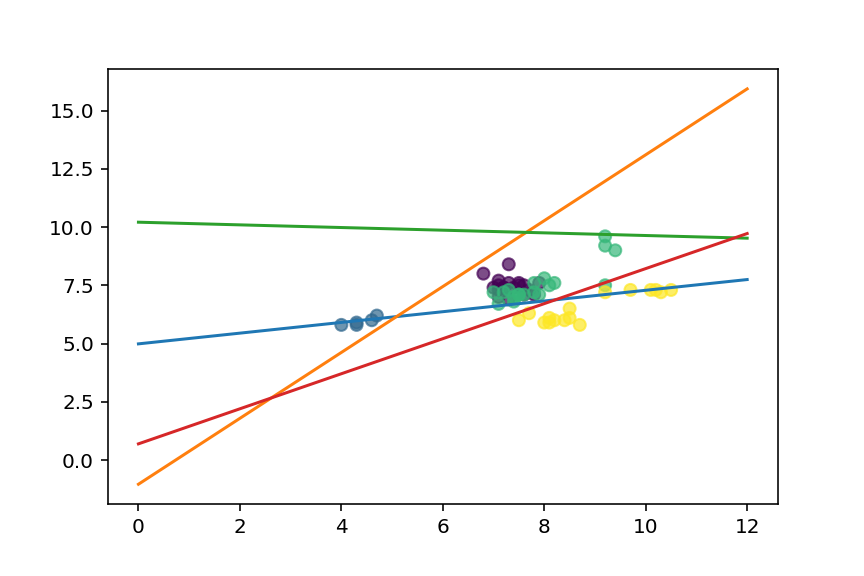

In [36]:
%matplotlib notebook
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)
clf = LinearSVC(C = 5, random_state = 0).fit(X_train, y_train)
plt.scatter(X_fruits_2d['height'], X_fruits_2d['width'], c = y_fruits_2d, alpha = 0.7)
x = np.linspace(0, 12)
for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'b', 'g', 'yellow']):
    plt.plot(x, -(x * w[0] + b) / w[1])
